#**LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_number=-6
end_number=6
number_of_points=1000
weightage_of_noise=1

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [3]:
## Use the Regression class defined in the previous lab
from turtle import color


def generate_polynomial_model_matrix_inversion(y,x):
    model=regression()
    weights=model.mat_inv(y=y,x_aug=x)
    weights=np.reshape(weights,newshape=(weights.shape[0],1))
    [y_pred,error]=model.error(w=weights,y=y,x=x)
    return [weights,y_pred,error]


class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        w=w_old+(2*lr/y.shape[0])*np.matmul(x,(y-np.matmul(x.T,w_old)))
        return w

    def error(self,w,y,x):
        y=np.reshape(y,newshape=(y.shape[0],1))
        number_of_elements=y.shape[0]
        y_pred=np.matmul(x.T,w)
        if(y_pred.shape[1]!=1):
            print("Incorrect dimesnions of y_pred")
            return -1
        squared_sum_error_matrix=(y-y_pred)**2
        sum_of_squares_of_error=np.sum(squared_sum_error_matrix)
        err=sum_of_squares_of_error**0.5/number_of_elements
        return [y_pred,err]

    def mat_inv(self,y,x_aug):
        weights=np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_aug,x_aug.T)),x_aug),y)# write code here
        return weights
      
    # By Gradien descent
    def Regression_grad_des(self,x,y,lr):
        w_old=np.zeros((x.shape[0],1))
        num_itr=1000
        err=[]
        y=np.reshape(y,newshape=(y.shape[0],1))
        if(y.shape[0]!=x.shape[1]):
            print("Incorrect dimensions of y")
            return -1
        for i in range(num_itr):
            w=self.grad_update(w_old=w_old,lr=lr,y=y,x=x)
            [ypred,error_new]=self.error(w,y,x)
            err.append(error_new)
            [y_pred,error_old]=self.error(w_old,y,x)
            dev=np.abs(error_new-error_old)
            if dev<=10**-7:
                w_old=w
                break
            w_old=w
        return w_old,err
    def Regression_grad_des_with_weights(self,x,y,lr,w_old):

        num_itr=10000
        # err=[]
        y=np.reshape(y,newshape=(y.shape[0],1))
        # if(x.shape[0]==5):
        #     num_itr=1
        if(y.shape[0]!=x.shape[1]):
            print("Incorrect dimensions of y")
            return -1

        for i in range(num_itr):
            w=self.grad_update(w_old=w_old,lr=lr,y=y,x=x)
            [ypred,error_new]=self.error(w,y,x)
            # err.append(error)
            [y_pred,error_old]=self.error(w_old,y,x)
            dev=np.abs(error_new-error_old)
            # print(error_new)
            if dev<=10**-5:
                w_old=w
                break
            w_old=w
        return w_old,error_new


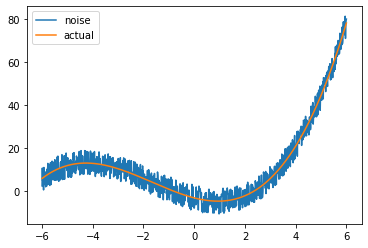

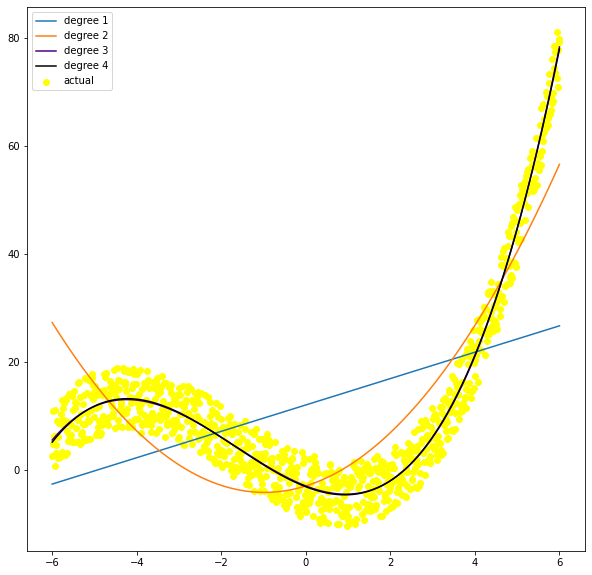

For degree 1
Optimal Weights are
 [[12.02637345]
 [ 2.44352656]]
Error at optimal weight is:-  0.5105606074778258


For degree 2
Optimal Weights are
 [[-2.98147932]
 [ 2.44352656]
 [ 1.24815559]]
Error at optimal weight is:-  0.2836973012238278


For degree 3
Optimal Weights are
 [[-2.98147932]
 [-3.02298638]
 [ 1.24815559]
 [ 0.25257399]]
Error at optimal weight is:-  0.10974755333498405


For degree 4
Optimal Weights are
 [[-3.13311122e+00]
 [-3.02298638e+00]
 [ 1.29019160e+00]
 [ 2.52573987e-01]
 [-1.35956093e-03]]
Error at optimal weight is:-  0.10966475705830644


In [4]:

x=np.linspace(start=start_number,stop=end_number,num=number_of_points)
y=0.25*x**3+1.25*x**2-3*x-3
noise=np.random.uniform(low=start_number,high=end_number,size=number_of_points)
y_cor=y+weightage_of_noise*noise
plt.plot(x,y_cor,label="noise")
plt.plot(x,y,label="actual")
plt.legend()
plt.show()
x=np.reshape(x,(1,1000))


#For degree 1
x_vector_for_degree_1_mv=np.r_[np.ones(shape=(1,number_of_points)),x]
[weights_for_degree_1,y_pred_for_degree_1,error_for_degree_1]=generate_polynomial_model_matrix_inversion(y=y_cor,x=x_vector_for_degree_1_mv)


#For degree 2
x_vector_for_degree_2=np.r_[np.ones(shape=(1,number_of_points)),x,x**2]
[weights_for_degree_2,y_pred_for_degree_2,error_for_degree_2]=generate_polynomial_model_matrix_inversion(y=y_cor,x=x_vector_for_degree_2)

#For Degree 3
x_vector_for_degree_3=np.r_[np.ones(shape=(1,number_of_points)),x,x**2,x**3]
[weights_for_degree_3,y_pred_for_degree_3,error_for_degree_3]=generate_polynomial_model_matrix_inversion(y=y_cor,x=x_vector_for_degree_3)

#For degreee 4
x_vector_for_degree_4=np.r_[np.ones(shape=(1,number_of_points)),x,x**2,x**3,x**4]
[weights_for_degree_4,y_pred_for_degree_4,error_for_degree_4]=generate_polynomial_model_matrix_inversion(y=y_cor,x=x_vector_for_degree_4)

weights_of_all_degrees=[weights_for_degree_1,weights_for_degree_2,weights_for_degree_3,weights_for_degree_4]
x=np.reshape(x,(1000,1))
fig=plt.figure(figsize=(10,10))
plt.scatter(x,y_cor,label="actual",color="yellow")
plt.plot(x,y_pred_for_degree_1,label="degree 1")
plt.plot(x,y_pred_for_degree_2,label="degree 2")
plt.plot(x,y_pred_for_degree_3,label="degree 3",color='indigo')
plt.plot(x,y_pred_for_degree_4,label="degree 4",color="black")
plt.legend()
plt.show()

print("For degree 1")
print("Optimal Weights are\n",weights_for_degree_1)
print("Error at optimal weight is:- ",error_for_degree_1)

print("\n\nFor degree 2")
print("Optimal Weights are\n",weights_for_degree_2)
print("Error at optimal weight is:- ",error_for_degree_2)

print("\n\nFor degree 3")
print("Optimal Weights are\n",weights_for_degree_3)
print("Error at optimal weight is:- ",error_for_degree_3)

print("\n\nFor degree 4")
print("Optimal Weights are\n",weights_for_degree_4)
print("Error at optimal weight is:- ",error_for_degree_4)



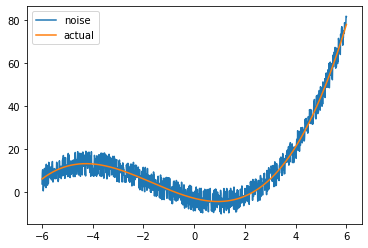

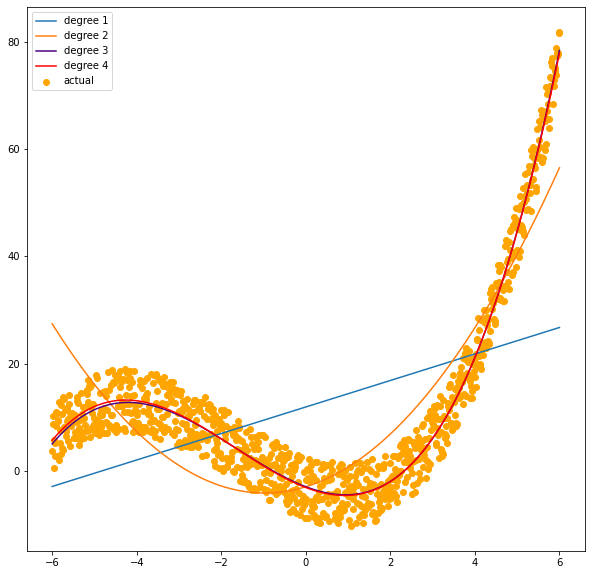

For degree 1
Optimal Weights are
 [[11.91806822]
 [ 2.46976818]]
Error at optimal weight is:-  0.5098152264155261


For degree 2
Optimal Weights are
 [[-2.95116219]
 [ 2.42444008]
 [ 1.24771728]]
Error at optimal weight is:-  0.2813887793752614


For degree 3
Optimal Weights are
 [[-2.95144163]
 [-2.99236917]
 [ 1.24084701]
 [ 0.2529559 ]]
Error at optimal weight is:-  0.1102700204762468


For degree 4
Optimal Weights are
 [[-3.10177941e+00]
 [-2.99274847e+00]
 [ 1.27730379e+00]
 [ 2.50220176e-01]
 [-8.31971261e-04]]
Error at optimal weight is:-  0.11050322863147566


In [5]:

# By Gradient Descent 
lambdas=[0.01,0.001,0.0001,0.00000075]
def generate_polynomial_model_gradient_descent(y,x,degree):
    model=regression()
    weights,error=model.Regression_grad_des_with_weights(x=x,y=y,lr=lambdas[degree-1],w_old=0.99*weights_of_all_degrees[degree-1])
    y_pred=x.T @ weights
    return [weights,y_pred,error]

    
## Write your code here
x=np.linspace(start=start_number,stop=end_number,num=number_of_points)
y=0.25*x**3+1.25*x**2-3*x-3
noise=np.random.uniform(low=start_number,high=end_number,size=number_of_points)
y_cor=y+weightage_of_noise*noise
plt.plot(x,y_cor,label="noise")
plt.plot(x,y,label="actual")
plt.legend()
plt.show()
x=np.reshape(x,(1,1000))


#For degree 1
x_vector_for_degree_1=np.r_[np.ones(shape=(1,number_of_points)),x]
[weights_for_degree_1,y_pred_for_degree_1,error_for_degree_1]=generate_polynomial_model_gradient_descent(y=y_cor,x=x_vector_for_degree_1,degree=1)


#For degree 2
x_vector_for_degree_2=np.r_[np.ones(shape=(1,number_of_points)),x,x**2]
[weights_for_degree_2,y_pred_for_degree_2,error_for_degree_2]=generate_polynomial_model_gradient_descent(y=y_cor,x=x_vector_for_degree_2,degree=2)

#For Degree 3
x_vector_for_degree_3=np.r_[np.ones(shape=(1,number_of_points)),x,x**2,x**3]
[weights_for_degree_3,y_pred_for_degree_3,error_for_degree_3]=generate_polynomial_model_gradient_descent(y=y_cor,x=x_vector_for_degree_3,degree=3)

# #For degreee 4
x_vector_for_degree_4=np.r_[np.ones(shape=(1,number_of_points)),x,x**2,x**3,x**4]
[weights_for_degree_4,y_pred_for_degree_4,error_for_degree_4]=generate_polynomial_model_gradient_descent(y=y_cor,x=x_vector_for_degree_4,degree=4)

x=np.reshape(x,(1000,1))
fig=plt.figure(figsize=(10,10))
plt.scatter(x,y_cor,label="actual",color="orange")
plt.plot(x,y_pred_for_degree_1,label="degree 1")
plt.plot(x,y_pred_for_degree_2,label="degree 2")
plt.plot(x,y_pred_for_degree_3,label="degree 3",color='indigo')
plt.plot(x,y_pred_for_degree_4,label="degree 4",color="red")
plt.legend()
plt.show()

print("For degree 1")
print("Optimal Weights are\n",weights_for_degree_1)
print("Error at optimal weight is:- ",error_for_degree_1)

print("\n\nFor degree 2")
print("Optimal Weights are\n",weights_for_degree_2)
print("Error at optimal weight is:- ",error_for_degree_2)

print("\n\nFor degree 3")
print("Optimal Weights are\n",weights_for_degree_3)
print("Error at optimal weight is:- ",error_for_degree_3)

print("\n\nFor degree 4")
print("Optimal Weights are\n",weights_for_degree_4)
print("Error at optimal weight is:- ",error_for_degree_4)


# Linear Regression

  Generate the data as shown in the figure below


In [6]:
start_number=0
end_number=1.3
number_of_points=200

optimal Weights:-
 [[-0.11389404]
 [ 1.01905114]]
Error at Optimal Weights:-
 0.01809237658323208


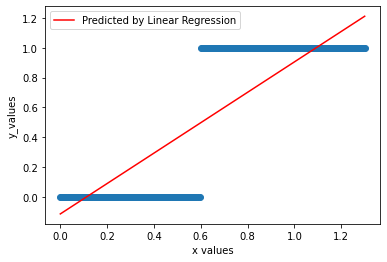

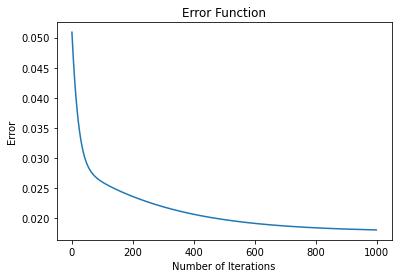

In [7]:
## Write your code here
x=np.linspace(start=start_number,stop=end_number,num=number_of_points)
y=x
pos=np.where(y<0.6)
neg=np.where(y>=0.6)
y=np.array(y,dtype=int)
y[pos]=0
y[neg]=1
plt.scatter(x,y)
#For degree 1
x=np.reshape(x,newshape=(1,number_of_points))
x_vector_for_degree_1=np.r_[np.ones(shape=(1,number_of_points)),x]
reg=regression()
weights,err=reg.Regression_grad_des(x=x_vector_for_degree_1,y=y,lr=0.01)
x=np.reshape(x,newshape=(number_of_points,1))
print("optimal Weights:-\n",weights)
print("Error at Optimal Weights:-\n",err[-1])
y_pred=x_vector_for_degree_1.T @ weights
plt.xlabel("x values")
plt.ylabel("y_values")
plt.plot(x,y_pred,color="red",label="Predicted by Linear Regression")
plt.legend()
plt.show()
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error Function")
plt.plot(err)
plt.show()


# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

Optimal Weights
 [[0.24924337]
 [0.23725208]]
Error at Optimal Weights 0.03406838578675097


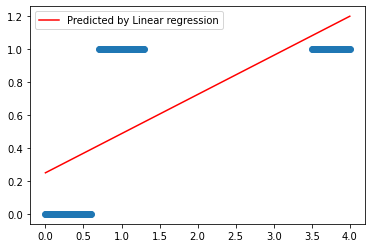

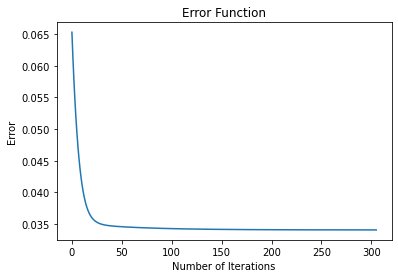

In [8]:
x1=np.linspace(start=0,stop=0.6,num=50)
y1=[0]*x1.shape[0]
x2=np.linspace(start=0.7,stop=1.3,num=40)
y2=[1]*x2.shape[0]
x3=np.linspace(start=3.5,stop=4,num=29)
y3=[1]*x3.shape[0]  
x_total=np.concatenate((x1,x2,x3))
y_total=np.concatenate((y1,y2,y3))
plt.scatter(x_total,y_total)

x_total=np.reshape(x_total,newshape=(1,x_total.shape[0]))
x_vector_for_degree_1=np.r_[np.ones(shape=(1,x_total.shape[1])),x_total]
reg=regression()
weights,err=reg.Regression_grad_des(x=x_vector_for_degree_1,y=y_total,lr=0.01)
x_total=np.reshape(x_total,newshape=((x_total.shape[1]),1))
y_pred=x_vector_for_degree_1.T @ weights
print("Optimal Weights\n",weights)
print("Error at Optimal Weights",err[-1])

plt.plot(x_total,y_pred,color="red",label="Predicted by Linear regression")
plt.legend()
plt.show()
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error Function")
plt.plot(err)
plt.show()

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

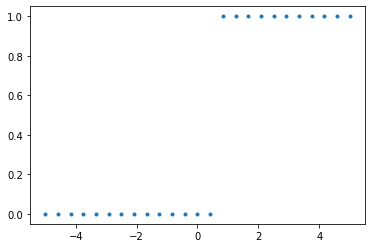

In [9]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [10]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):
  cost_fn_mse.append(np.sum((y-sigmoid(w0+w1[i]*x))**2)/(2*x.shape[0]))
  y_pred=sigmoid(w0+w1[i]*x)
  cost_fn_logis.append(np.sum((y*np.log(y_pred+0.0000001)+(1-y)*np.log(1-y_pred+0.0000001)))/(-x.shape[0]))

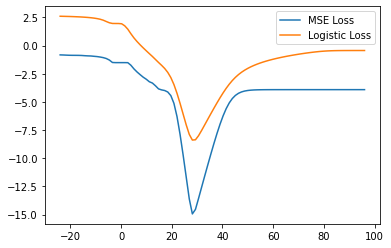

In [11]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

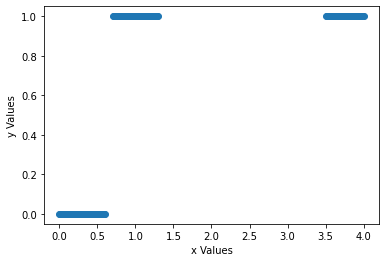

In [12]:
x1=np.linspace(start=0,stop=0.6,num=50)
y1=[0]*x1.shape[0]
x2=np.linspace(start=0.7,stop=1.3,num=40)
y2=[1]*x2.shape[0]
x3=np.linspace(start=3.5,stop=4,num=29)
y3=[1]*x3.shape[0]  
x_total=np.concatenate((x1,x2,x3))
y_total=np.concatenate((y1,y2,y3))
plt.xlabel("x Values")
plt.ylabel("y Values")
plt.scatter(x_total,y_total)

Define a Logistic Regression class

In [13]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    # write code here
    return 1/(1+np.exp(-x.T@w_old))

  def grad_update(self,w_old,lr,y,x):
   
    y=y.reshape((y.shape[0],1))
    w=w_old+(lr/x.shape[1])*(x@(y-self.logis(x,w_old)))
    return w

  def error(self,w,y,x):
    y=y.reshape((y.shape[0],1))
    y_pred=self.logis(x,w)
    return -np.sum((y*np.log(y_pred+0.0000001)+(1-y)*np.log(1-y_pred+0.0000001))/y.shape[0])
     # write code here

  def Regression_grad_des(self,x,y,lr):
    w_old=np.ones((x.shape[0],1))
    err=[]
    # print(w_old.shape)
    for i in range(1000):
      # write code here
      w_new=self.grad_update(w_old,lr,y,x)
      # print(str(i)+" iteration -",w_new,self.error(w_new,y,x))
      # print("/n")
      err.append(self.error(w_new,y,x))
      dev=np.abs(self.error(w_new,y,x)-self.error(w_old,y,x))
      if dev<=10**(-20):
        w_old=w_new
        break
      w_old=w_new

    return w_old,err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

(2, 119)
Optimal Weights
 [[-3.08150721]
 [ 4.74466168]]
Error at Optimal Weights 0.16802572159243115


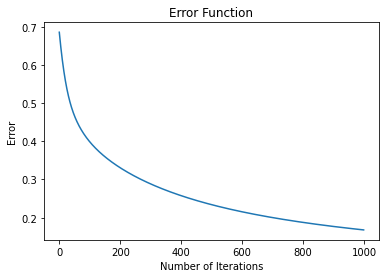

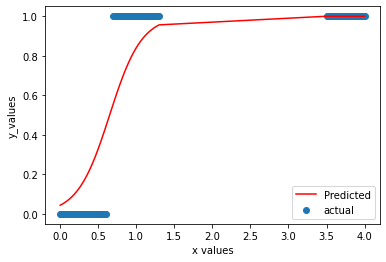

In [14]:
x_total=np.reshape(x_total,newshape=(1,x_total.shape[0]))
x_aug=np.r_[np.ones((1,x_total.shape[1])),x_total]
print(x_aug.shape)
reg=logis_regression()
weights,err = reg.Regression_grad_des(x_aug,y_total,0.1)
print("Optimal Weights\n",weights)
print("Error at Optimal Weights",err[-1])
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error Function")
plt.plot(err)
plt.show()

plt.plot(x_total.T,sigmoid(x_aug.T@weights),label="Predicted",color="red")
plt.xlabel("x values")
plt.ylabel("y_values")
plt.scatter(x_total,y_total,label="actual")
plt.legend()
plt.show()

# Classification of circularly separated data using logistic regression



(20, 20)


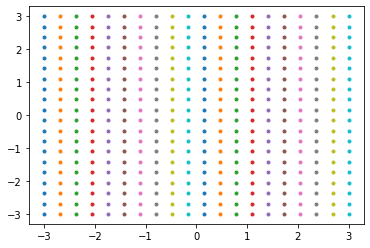

In [15]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')
print(x11.shape)

  Using the above data generate circular data

(400, 2)


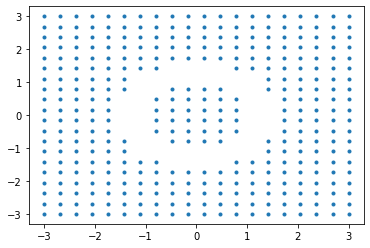

In [16]:
# Write code here
x1 = x11.flatten()
x1 = x1.reshape((x1.shape[0],1))
x2 = x22.flatten()          
x2 = x2.reshape((x2.shape[0],1))
x = np.c_[x1, x2] # create all ordered pairs 
print(x.shape)
in_pt_ind = np.where((x[:,0]**2 + x[:,1]**2) <= 1)
out_pt_ind = np.where((x[:,0]**2 + x[:,1]**2) >= 2.5)
# print(in_pt_ind[0])
x_in = x[in_pt_ind[0], :]
x_out = x[out_pt_ind[0], :]

x = np.r_[x_in,x_out] # our dataset

plt.figure()
plt.plot(x[:,0], x[:,1], '.')
plt.show()



As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

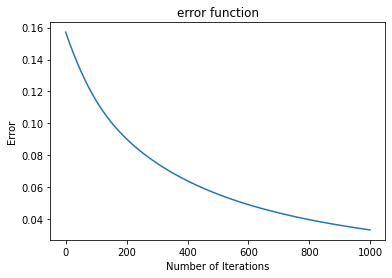

In [17]:
# perform logistic regression
y_in = np.zeros((x_in.shape[0]))
# print(y_in)
y_out = np.ones((x_out.shape[0]))
# print(y_out)
y = np.r_[y_in,y_out]
y_new=y.reshape((y.shape[0],1))

x_sq = (x.T)**2
x_aug = np.r_[np.ones((1, x.shape[0])),x_sq]

reg = logis_regression()
lr = 0.1
w_pred,err = reg.Regression_grad_des(x_aug, y_new, lr)
plt.figure()
plt.plot(err)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("error function")
plt.show()

Plot classification using 0.5 as threshold

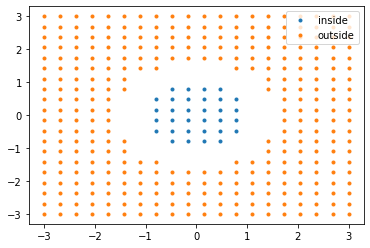

In [18]:
#write code here
y_pred = reg.logis(x_aug,w_pred)

in_pred, _ = np.where(y_pred < 0.5)
out_pred, _ = np.where(y_pred >= 0.5)

x_in_pred = x[in_pred,:]
x_out_pred = x[out_pred,:]

plt.figure()
plt.plot(x_in_pred[:,0], x_in_pred[:,1], '.',label="inside")
plt.plot(x_out_pred[:,0], x_out_pred[:,1], '.',label="outside")
plt.legend()
plt.show()

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300,)


Text(0.5, 1.0, 'y_actual')

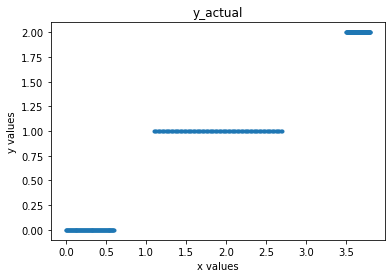

In [19]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("y_actual")


In [20]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)


In [21]:
# plot for classification
from turtle import title

def plot_op(x,y_pred):

  ind0,_=np.where(y_pred<0.5)
  ind1,_=np.where(y_pred>=0.5)
  x0=x[ind0]
  x1=x[ind1]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y',label="class 0")
  plt.plot(x1,np.ones((x1).shape),'x',color='r',label="class 1")
  plt.legend()
  

Using the above function for plotting, plot the curve using different configurations

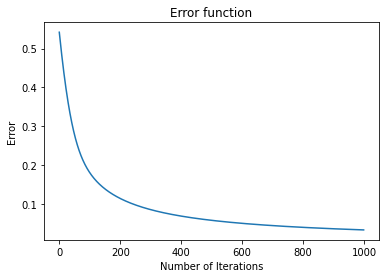

Optimal Weights
 [[-3.37710198]
 [ 0.95274342]
 [ 2.70116121]]
Error at Optimal Weights 0.03273105792625165


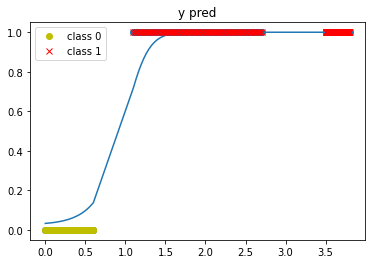

In [22]:
# take class 0 as '0' and other to '1'
## Write your code here
y_copy=np.array(y!=0,dtype=int)
reg=logis_regression()
weights,err = reg.Regression_grad_des(x_aug,y_copy,0.1)

plt.plot(err)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error function")
plt.show()
y_pred0=sigmoid(x_aug.T@weights)
plt.scatter(x,y_copy)
plt.plot(x,y_pred0)
plot_op(x=x,y_pred=y_pred0.reshape(y_pred0.shape[0],1))
plt.title("y pred")
print("Optimal Weights\n",weights)
print("Error at Optimal Weights",err[-1])

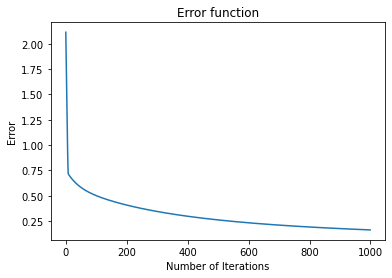

Optimal Weights
 [[ 3.03156849]
 [-5.24177546]
 [ 1.424629  ]]
Error at Optimal Weights 0.16359283007696068


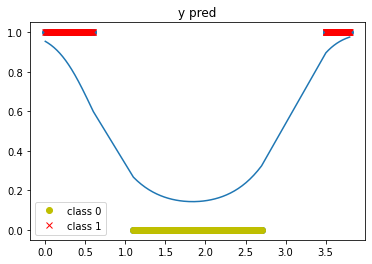

In [23]:
# take class 1 as '0' and other to '1'
## Write your code here
y_copy=np.array(y!=1,dtype=int)
# print(y_copy)
weights,err = reg.Regression_grad_des(x_aug,y_copy,0.1)
plt.plot(err)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error function")
plt.show()
y_pred1=sigmoid(x_aug.T@weights)
plt.scatter(x,y_copy)
plt.plot(x,y_pred1)
plot_op(x=x,y_pred=y_pred1.reshape(y_pred1.shape[0],1))
plt.title("y pred")
print("Optimal Weights\n",weights)
print("Error at Optimal Weights",err[-1])

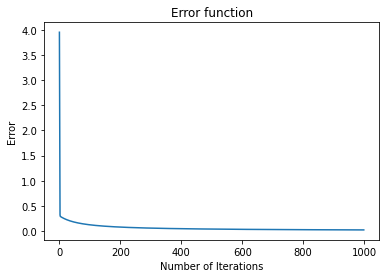

Optimal Weights
 [[ 3.88557735]
 [ 2.90894296]
 [-1.41013816]]
Error at Optimal Weights 0.021116425656068975


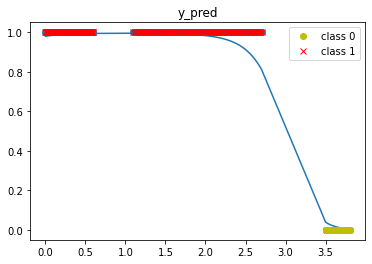

In [24]:
# Take class 2 as '0' and other to '1'
## Write your code here
y_copy=np.array(y!=2,dtype=int)
weights,err = reg.Regression_grad_des(x_aug,y_copy,0.1)
plt.plot(err)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error function")
plt.show()
y_pred2=sigmoid(x_aug.T@weights)
plt.scatter(x,y_copy)
plt.plot(x,y_pred2)
plot_op(x=x,y_pred=y_pred2.reshape(y_pred2.shape[0],1))
plt.title("y_pred")
print("Optimal Weights\n",weights)
print("Error at Optimal Weights",err[-1])

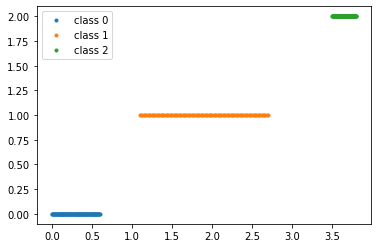

In [25]:
# final classification
## Write your code here
index = np.where(y_pred0<0.5)[0]
x_0 = x[index]
index = np.where(y_pred1<0.5)[0]
x_1 = x[index]
index = np.where(y_pred2<0.5)[0]
x_2 = x[index]

plt.figure()
plt.plot(x_0, np.zeros(x_0.shape), '.',label="class 0")
plt.plot(x_1, np.ones(x_1.shape), '.',label="class 1")
plt.plot(x_2, np.tile([2], x_2.shape), '.',label="class 2")
plt.legend()
plt.show()

